In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

In [2]:
customer_df = pd.read_csv("Data/Cleaned_Data_Marketing_Customer_Analysis_Round2.csv")

In [3]:
customer_df.dropna(inplace=True)

In [4]:
# X y Split 

X = customer_df.drop('Total Claim Amount', axis=1)

y = customer_df['Total Claim Amount'] #target variable

In [5]:
# split X to numeric and categorical for transformation

X_numeric = X._get_numeric_data()
X_numeric.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

X_categorical = X.select_dtypes(np.object)

X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
X_categorical['Number of Policies'] = customer_df['Number of Policies']
X_categorical.drop('Customer', axis=1, inplace=True)

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_83422/520087021.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_categorical = X.select_dtypes(np.object)
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_83422/520087021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_83422/520087021.py:9: SettingWithCopyWarning: 
A valu

In [6]:
# Data splitting (just numerical columns) - TRAIN / TEST

X_num_train, X_num_test, y_train, y_test = train_test_split(X_numeric,y,test_size=.30,random_state=123)

In [7]:
# Standardize the data (just for the numerical columns)

#TRAIN

std_scaler=StandardScaler().fit(X_num_train)   

X_num_train_scaled=std_scaler.transform(X_num_train)

In [8]:
#TEST

X_num_test_scaled=std_scaler.transform(X_num_test)

In [9]:
#Quantile Transformer

#qt = QuantileTransformer(output_distribution="normal").fit(X_num_train_scaled)

#income_train_transformed = qt.transform(X_num_train_scaled)   ## to_numpy().reshape(-1,1)) <-- this and column name next to df name only if standard scaler wasnt used before.

#sns.displot(income_train_transformed)

In [10]:
# Model fitting 

model=LinearRegression()    
model.fit(X_num_train_scaled, y_train)

LinearRegression()

In [11]:
#coefficients

model.coef_

array([ -6.56693665, -55.39664806, 167.08126566,  -6.16343291,
        -5.55103635])

In [12]:
#intercept

model.intercept_

378.1744001695634

In [13]:
#score of the model

model.score(X_num_test_scaled, y_test)

0.4384805950087882

In [14]:
#prediciton

y_pred=model.predict(X_num_test_scaled)

In [15]:
y_pred

array([343.425438  , 192.25220012, 363.16155879, ..., 406.75684475,
       286.58461196, 455.63398348])

In [16]:
y_test

1984     523.89
6363     355.20
10639    395.73
8774     321.60
1840     394.97
          ...  
768      355.20
9904     199.28
3387     412.80
6965     297.60
8063     504.00
Name: Total Claim Amount, Length: 1011, dtype: float64

In [17]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
1984,523.89,343.425438
6363,355.20,192.252200
10639,395.73,363.161559
8774,321.60,314.878275
1840,394.97,471.621107
...,...,...
768,355.20,309.786963
9904,199.28,229.190837
3387,412.80,406.756845
6965,297.60,286.584612


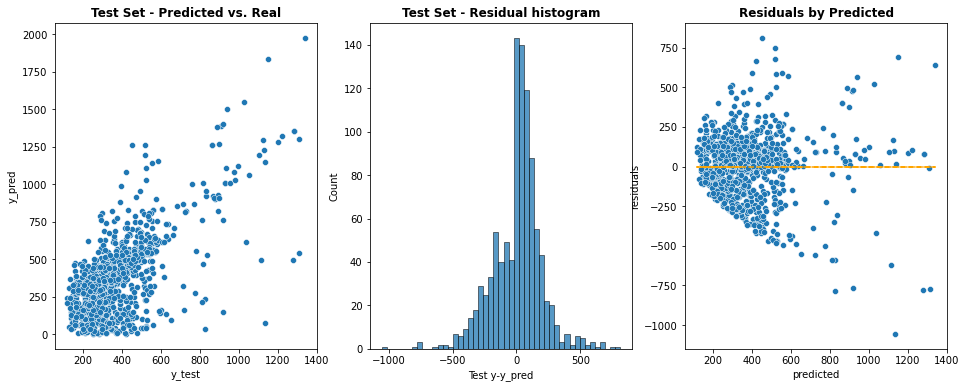

In [18]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

In [19]:
#Model validation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

38232.60323350813
139.7489547899727
195.5315913951199


In [20]:
#Feature Importance

features_importances = pd.DataFrame(data={
    'Attribute': X_num_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [21]:
features_importances

,Attribute,Importance
2,Monthly Premium Auto,167.081266
1,Income,55.396648
0,Customer Lifetime Value,6.566937
3,Months Since Last Claim,6.163433
4,Months Since Policy Inception,5.551036
